# Exploratory data analysis (EDA) of car data

## Libraries and settings

In [1]:
# Libraries
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta

# seaborn graphics settings
sns.set_theme(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/python_exploratory_data_analysis


## Importing the car data

### Importing the car data

In [2]:
# Columns to read
columns = ["Offer_Id",
            "Type",
            "Price",
            "HP",
            "Mileage",
            "Fuel_Type",
            "Transmission",
            "Dealer_PLZ",
            "Dealer_City",
            "Dealer_Street_House_Nr",
            "Init_Regist_MY",
            "Init_Regist_Month",
            "Init_Regist_Year",
            "Init_Regist_Dt"]

# Read and select variables
df_orig = pd.read_csv("autoscout24_data_enriched_cleaned.csv", sep=",")[columns]

# Change column names to lower case
df_orig.columns = df_orig.columns.str.lower()

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df = df_orig.dropna()
df.head(5)

,offer_id,type,price,hp,mileage,fuel_type,transmission,dealer_plz,dealer_city,dealer_street_house_nr,init_regist_my,init_regist_month,init_regist_year,init_regist_dt
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,22500,245,75000,Diesel,Automatisiertes Schaltgetriebe,8488,Turbenthal,Mettlenstrasse 3,10.2014,10.0,2014.0,2014-10
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),23749,184,46655,Benzin,Automat sequentiell,3186,Düdingen,Brugerastrasse 60,6.2013,6.0,2013.0,2013-06
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,18500,306,138955,Benzin,Automat sequentiell,1262,Eysins,1262 Eysins,6.2011,6.0,2011.0,2011-06
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,36000,360,43000,Benzin,Automatisiertes Schaltgetriebe,4314,Zeiningen,Am Stutz 21,8.2015,8.0,2015.0,2015-08
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,48500,252,43300,Benzin,Automatisiertes Schaltgetriebe,3250,Lyss,3250 Lyss,9.2018,9.0,2018.0,2018-09


## Univariate non-graphical exploratory data analysis (EDA)

### Quantiles

In [3]:
# Calculate Quantiles 
df[['price', 'hp', 'mileage']].quantile(
    q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,hp,mileage
0.05,4000.0,90.0,13700.0
0.10,5900.0,110.0,23000.0
0.25,10900.0,150.0,45000.0
0.50,19900.0,204.0,83500.0
0.75,35900.0,306.0,130000.0
0.90,56900.0,405.0,176000.0
0.95,72500.0,469.5,206090.5


### Shape (number of rows and colums)

In [4]:
# Number of rows and columns
print(df.shape)

(3971, 14)


### Data types

In [5]:
# Show data types
df.dtypes

offer_id                    int64
type                       object
price                       int64
hp                          int64
mileage                     int64
fuel_type                  object
transmission               object
dealer_plz                  int64
dealer_city                object
dealer_street_house_nr     object
init_regist_my            float64
init_regist_month         float64
init_regist_year          float64
init_regist_dt             object
dtype: object

### Summary statistics of numeric variables

In [6]:
# Show summary statistics of variables
df.describe()

,offer_id,price,hp,mileage,dealer_plz,init_regist_my,init_regist_month,init_regist_year
count,3.971000e+03,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000
mean,7.242907e+06,27527.641652,235.831025,92952.412491,5522.633594,6.510513,6.309494,2010.189121
std,4.655890e+05,26670.221155,119.671388,61097.990134,2848.337824,3.386338,3.386320,9.610067
min,1.395491e+06,160.000000,16.000000,1.000000,1000.000000,1.194600,1.000000,1929.000000
25%,7.249691e+06,10900.000000,150.000000,45000.000000,3014.000000,3.201800,3.000000,2008.000000
50%,7.408668e+06,19900.000000,204.000000,83500.000000,6003.000000,6.201400,6.000000,2013.000000
75%,7.456806e+06,35900.000000,306.000000,130000.000000,8304.500000,9.201500,9.000000,2016.000000
max,7.512843e+06,428000.000000,772.000000,370000.000000,9657.000000,12.201900,12.000000,2020.000000


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [7]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.mileage.count(), 1),
      'Min:', round(df.mileage.min(), 1),
      'Max:', round(df.mileage.max(), 1),
      'Mean:', round(df.mileage.mean(), 1),
      'Median:', round(df.mileage.median(), 1),
      'Std:', round(df.mileage.std(), 1))

Price: Count: 3971 Min: 160 Max: 428000 Mean: 27527.6 Median: 19900.0 Std: 26670.2
Area: Count: 3971 Min: 1 Max: 370000 Mean: 92952.4 Median: 83500.0 Std: 61098.0


### Skewness

In [8]:
df[['price', 'hp', 'mileage']].skew()

price      4.077049
hp         1.093046
mileage    0.886538
dtype: float64

### Kurtosis

In [9]:
df[['price', 'hp', 'mileage']].kurtosis()

price      36.506763
hp          1.226153
mileage     0.739533
dtype: float64

### Extreme values

In [10]:
# Low costs cars
df[df['price'] <= 500]

,offer_id,type,price,hp,mileage,fuel_type,transmission,dealer_plz,dealer_city,dealer_street_house_nr,init_regist_my,init_regist_month,init_regist_year,init_regist_dt
1651,7452246,FIAT Punto 1.4 16V Sporting (Kleinwagen),500,95,127600,Benzin,Schaltgetriebe manuell,2000,Neuchâtel,Rue Léon-Berthoud 14,7.2004,7.0,2004.0,2004-07
3704,7372156,VW Golf Variant 1800 Rolling Stones (Kombi),160,90,217650,Benzin,Schaltgetriebe manuell,1426,Concise,Aux Petits Prés 1,10.1995,10.0,1995.0,1995-10
3905,7510439,VOLVO V70 2.5 T XC AWD Nordic (Kombi),400,193,253000,Benzin,Automat,9553,Bettwiesen,Hauptstrasse 51,1.1999,1.0,1999.0,1999-01


In [11]:
# Very expansive cars
df[df['price'] >= 250000]

,offer_id,type,price,hp,mileage,fuel_type,transmission,dealer_plz,dealer_city,dealer_street_house_nr,init_regist_my,init_regist_month,init_regist_year,init_regist_dt
312,6978696,LAMBORGHINI Aventador S LP740-4 Roadster E-Gea...,384900,741,4000,Benzin,Automatisiertes Schaltgetriebe,8008,Zürich,8008 Zürich,6.2018,6.0,2018.0,2018-06
1621,6395032,PORSCHE 911 GT2 RS (Coupé),428000,620,8900,Benzin,Schaltgetriebe manuell,1628,Vuadens,Route principale 144,1.2011,1.0,2011.0,2011-01
1824,5887777,MERCEDES-BENZ 220 SE (Cabriolet),255000,120,1200,Benzin,Schaltgetriebe manuell,6052,Hergiswil,Sonnenbergstrasse 9,7.1960,7.0,1960.0,1960-07
2714,7448261,PORSCHE 911 Speedster Manual Gearbox Chalk whi...,379000,510,14,Benzin,Schaltgetriebe,1004,Lausanne,.,3.2020,3.0,2020.0,2020-03
3876,6768872,McLAREN 675LT Coupé 3.8 V8 SSG (Coupé),280000,675,11500,Benzin,Automatisiertes Schaltgetriebe,1202,Geneve,1202 Geneve,3.2016,3.0,2016.0,2016-03


### Get a list of categories of categorical variable

In [12]:
np.array(pd.Categorical(df['fuel_type']).categories)

array(['Automat', 'Automatik-Getriebe', 'Benzin', 'Diesel', 'Elektro',
       'Erdgas (CNG) / Benzin', 'Flüssiggas (LPG) / Benzin',
       'Hybrid Benzin/Elektro', 'Hybrid Diesel/Elektro',
       'Mild-Hybrid Benzin/Elektro', 'Mild-Hybrid Diesel/Elektro',
       'Plug-in-Hybrid Benzin/Elektro', 'Plug-in-Hybrid Diesel/Elektro',
       'Schaltgetriebe', 'Schaltgetriebe manuell',
       'Voll-Hybrid Benzin/Elektro', 'Voll-Hybrid Diesel/Elektro'],
      dtype=object)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [13]:
pd.crosstab(df['fuel_type'], df['transmission'])

transmission,Allrad,Automat,Automat sequentiell,Automat stufenlos,"Automat stufenlos, sequentiell",Automatik-Getriebe,Automatisiertes Schaltgetriebe,Hinterradantrieb,Schaltgetriebe,Schaltgetriebe manuell,Schaltgetriebe sequentiell
fuel_type,,,,,,,,,,,
Automat,0,0,0,0,0,0,0,1,0,0,0
Automatik-Getriebe,1,0,0,0,0,0,0,0,0,0,0
Benzin,1,244,487,8,25,62,713,1,35,1070,2
Diesel,0,64,564,1,11,21,198,0,10,306,0
Elektro,0,0,0,6,0,1,58,0,0,2,0
Erdgas (CNG) / Benzin,0,0,0,0,0,0,0,0,0,1,0
Flüssiggas (LPG) / Benzin,0,0,0,0,0,0,0,0,0,1,0
Hybrid Benzin/Elektro,0,0,0,0,0,1,0,0,0,0,0
Hybrid Diesel/Elektro,0,0,0,0,0,0,0,0,1,0,0


### Pivot tables

In [14]:
# Using pivot_table to reshape the data and calculate means
pd.pivot_table(df[['mileage', 'price', 'hp', 'fuel_type']],
               index=['fuel_type'],
               values=['price', 'mileage', 'hp'],
               aggfunc=(np.mean, 'count')).round(2)

hp         mileage            price          
                              count    mean   count       mean count      mean
fuel_type                                                                     
Automat                           1  304.00       1   76000.00     1  49000.00
Automatik-Getriebe                1  258.00       1   37800.00     1  79999.00
Benzin                         2648  247.91    2648   89429.19  2648  27889.74
Diesel                         1175  197.28    1175  104776.46  1175  24976.57
Elektro                          67  446.57      67   61678.73    67  51967.18
Erdgas (CNG) / Benzin             1   85.00       1   50561.00     1   5900.00
Flüssiggas (LPG) / Benzin         1   97.00       1   83000.00     1   4800.00
Hybrid Benzin/Elektro             1  339.00       1  128356.00     1  19900.00
Hybrid Diesel/Elektro             1  261.00       1  263209.00     1  34000.00
Mild-Hybrid Benzin/Elektro        3  269.67       3   19536.67     3  60130.00
Mild-Hybrid Diesel/Elektro        2  340.00       2   18295.00     2  82250.00
Plug-in-Hybrid Benzin/Elektro    26  278.69      26   44840.38    26  40159.62
Plug-in-Hybrid Diesel/Elektro     4  286.00       4   68871.75     4  28622.50
Schaltgetriebe                    3  242.67       3  107500.33     3  28383.33
Schaltgetriebe manuell            1  125.00       1   65000.00     1  31900.00
Voll-Hybrid Benzin/Elektro       31  168.48      31   67621.29    31  23470.65
Voll-Hybrid Diesel/Elektro        5  200.20       5   80300.00     5  17837.40

### Correlation matrix

In [15]:
corr = df[['mileage', 
          'price', 
          'hp', 
]].corr()
corr

,mileage,price,hp
mileage,1.000000,-0.436815,-0.126362
price,-0.436815,1.000000,0.614575
hp,-0.126362,0.614575,1.000000


### Covariance matrix

In [16]:
cov = df[['mileage', 
          'price', 
          'hp', 
]].cov()
cov

,mileage,price,hp
mileage,3.732964e+09,-7.117892e+08,-9.239156e+05
price,-7.117892e+08,7.113007e+08,1.961515e+06
hp,-9.239156e+05,1.961515e+06,1.432124e+04


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

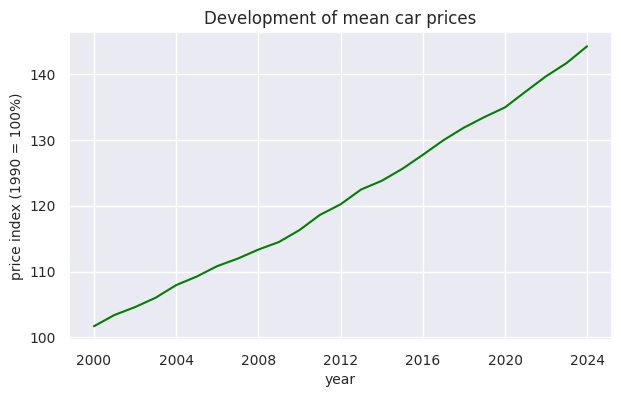

In [17]:
# Generate time series data for mean car prices over the last 20 years
x = []
y = []

# Start from 25 years ago with an initial price
start_date_trend = datetime(2000, 1, 1)
initial_price = 100

for i in range(25):
    date = start_date_trend + timedelta(days=365 * i)
    price_increase_factor = 1 + random.uniform(0.01, 0.02)
    initial_price *= price_increase_factor
    x.append(date)
    y.append(round(initial_price, 2))

# Create a DataFrame to display the data
rental_prices_trend_df = pd.DataFrame({
    "Year": x,
    "Price (USD)": y
})


# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of mean car prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='mileage'>

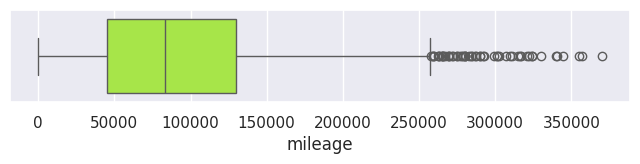

In [18]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['mileage'], color="greenyellow")

### Histogram  (matplotlib)

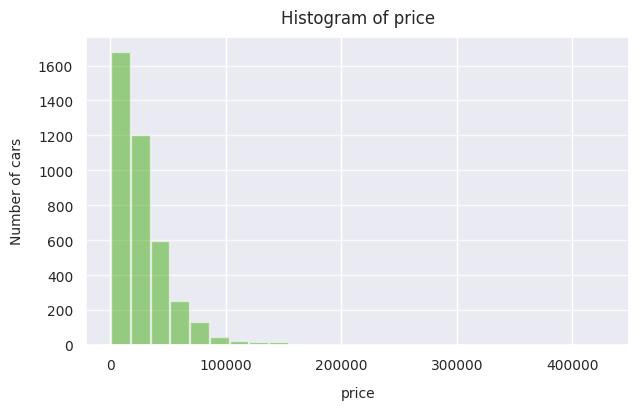

In [19]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price', fontsize=10, labelpad=10)
plt.ylabel('Number of cars', fontsize=10, labelpad=10)
plt.title('Histogram of price', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

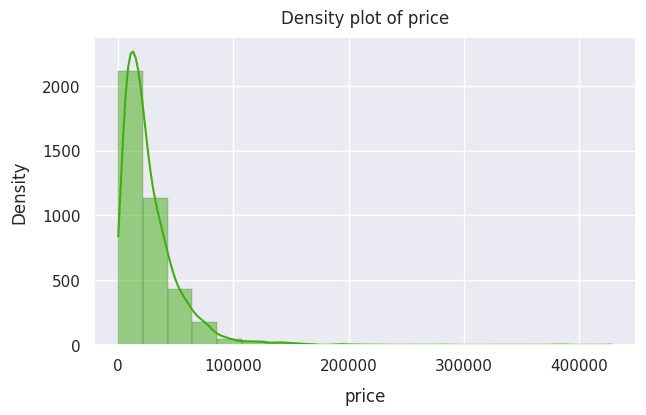

In [20]:
plt.figure(figsize=(7,4))
sns.histplot(df['price'], 
             bins=20, 
             color='#42AD12',
             alpha=0.5,
             kde=True, 
             edgecolor='black', 
             linewidth=0.1)

plt.title('Density plot of price', fontsize=12, pad=10)
plt.xlabel('price', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      mileage       var
1140        1 -1.521350
832         1 -1.521350
3418       10 -1.521202
3618       10 -1.521202
2695       11 -1.521186
...       ...       ...
2597   340890  4.058032
3073   344500  4.117117
2723   355000  4.288972
1288   356673  4.316355
988    370000  4.534480

[3971 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

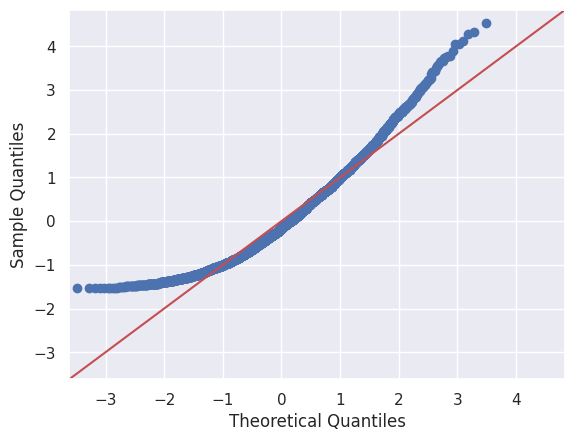

In [21]:
# Variable (standardized)
x = 'mileage'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['mileage', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
plt.show

### Barchart  (matplotlib)

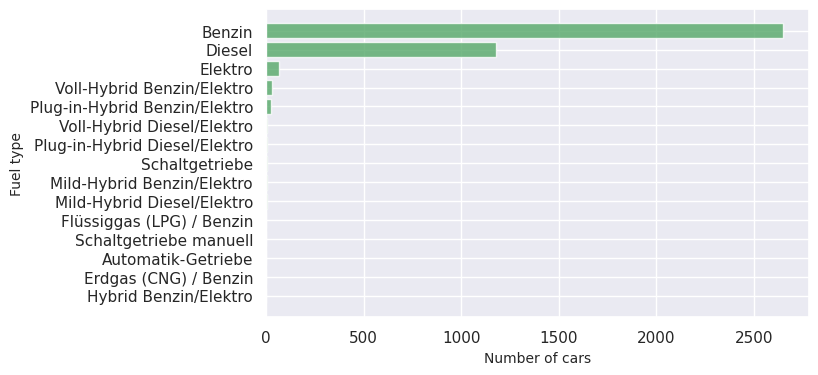

In [22]:
# Group data by fuel_type (only the topmost 15 values are shown)
df_bar = df['fuel_type'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of cars', fontsize=10)
ax.set_ylabel('Fuel type', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

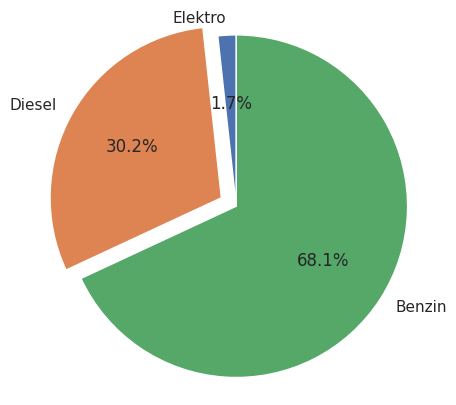

In [23]:
# Subset of cars with fuel type
df_fuel = df[df['fuel_type'].isin(['Diesel', 'Benzin', 'Elektro'])]

# Group data (only the 8 most frequently occurencies by fuel type)
df_bar = df_fuel.fuel_type.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0.1, 0) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

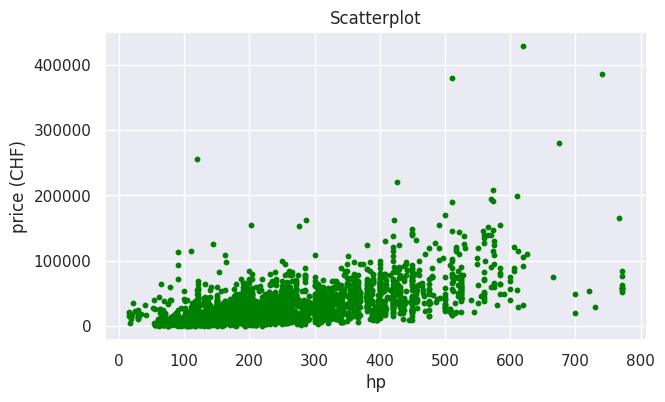

In [24]:
plt.figure(figsize=(7,4))
plt.scatter(df['hp'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('hp')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(3963, 15)
136.82386275955662
-4720.431165293197


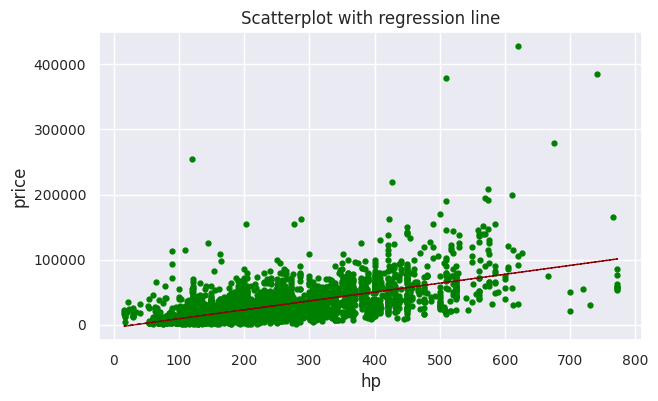

In [25]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.hp, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.hp, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.hp, 
         b*df_sub.hp + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('hp', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

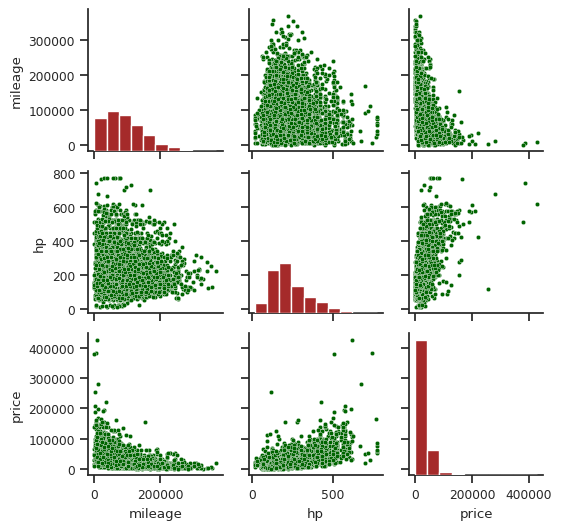

In [26]:
sns.set_theme(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['mileage', 
                     'hp', 
                     'price']], 
                 height=1.8, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(3555, 15)


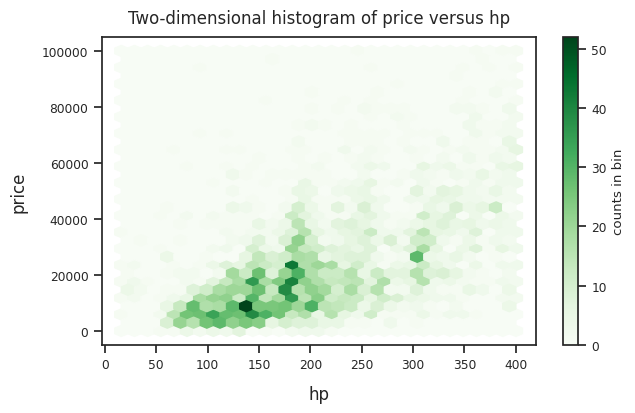

In [27]:
# Subset
df_sub = df.loc[(df.price <= 100000) & (df.hp <= 400)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.hp, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('hp', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus hp', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

         mileage    hp  price
mileage     1.00 -0.13  -0.44
hp         -0.13  1.00   0.61
price      -0.44  0.61   1.00


<Axes: >

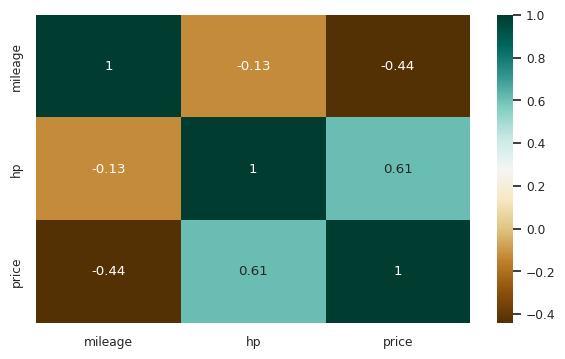

In [28]:
# Set font size for plot
sns.set_theme(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
corr = df[['mileage', 
            'hp', 
            'price']].corr().round(2)
print(corr)

# Plot heatmap
plt.figure(figsize=(7,4))
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

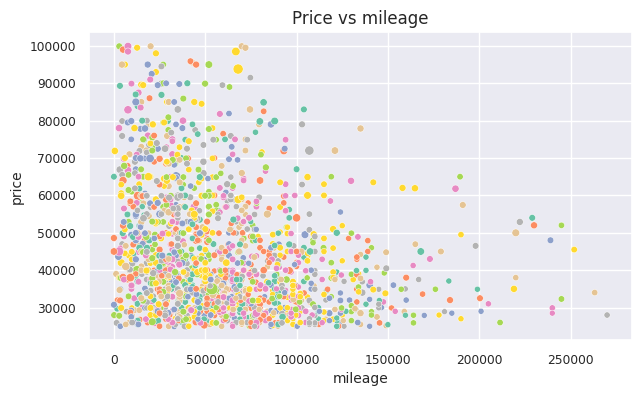

In [29]:
# Calculate price per hp
df['price_per_hp'] = df['price'] / df['hp']

# Subset of df
df_sub = df.loc[(df['price'] >= 25000) & (df['price'] <= 100000)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="mileage", 
                     y="price",
                     size="price_per_hp", # determines bubble size
                     hue="mileage",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs mileage', fontsize = 12)
ax.set_xlabel('mileage', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [30]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-10 17:07:00
Python Version: 3.11.10
-----------------------------------
